# 🧊 Matrices $3 \times 3$ en $\mathbb{R}^3$

Las matrices $3 \times 3$ son herramientas fundamentales para representar y analizar **transformaciones lineales en el espacio tridimensional**.  
Permiten describir rotaciones, escalas, reflejos, proyecciones y deformaciones en $\mathbb{R}^3$.

En esta lección estudiaremos su estructura, operaciones básicas, determinante, interpretación geométrica y cómo aplicarlas computacionalmente.

---

## 🔹 1. Definición

Una matriz $3 \times 3$ es una tabla de 3 filas y 3 columnas:

$$
A =
\begin{pmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33}
\end{pmatrix}
$$

La representación matricial de una transformación lineal es:

$$
T_A(\mathbf{x}) = A\mathbf{x}
\quad\text{para}\quad
\mathbf{x} = (x_1, x_2, x_3)
$$

---

## 🔹 2. Operaciones básicas

### ➕ Suma

$$
A + B = (a_{ij} + b_{ij})
$$

### ✖️ Multiplicación por escalar

$$
\alpha A = (\alpha a_{ij})
$$

### ✖️ Multiplicación de matrices

$$
(AB)_{ij} = \sum_{k=1}^3 a_{ik} b_{kj}
$$

---

### 💻 Ejemplo en código

In [1]:
import numpy as np

A = np.array([[1, 2, 0],
              [0, 1, 1],
              [3, 0, 1]])

B = np.array([[2, 1, 0],
              [0, 1, 3],
              [1, 0, 1]])

print("A + B:\n", A + B)
print("\n2A:\n", 2 * A)
print("\nA * B:\n", A @ B)

A + B:
 [[3 3 0]
 [0 2 4]
 [4 0 2]]

2A:
 [[2 4 0]
 [0 2 2]
 [6 0 2]]

A * B:
 [[2 3 6]
 [1 1 4]
 [7 3 1]]



---

## 🔹 3. Determinante en matrices $3 \times 3$

El determinante de una matriz tridimensional mide:

* El **factor de volumen** que aplica la transformación
* Si la matriz preserva o invierte la orientación
* Si la matriz es invertible o no

$$
\det(A) = a_{11}
\begin{vmatrix}
a_{22} & a_{23} \\
a_{32} & a_{33} \\
\end{vmatrix}

* a_{12}
  \begin{vmatrix}
  a_{21} & a_{23} \\
  a_{31} & a_{33} \\
  \end{vmatrix}

- a_{13}
  \begin{vmatrix}
  a_{21} & a_{22} \\
  a_{31} & a_{32} \\
  \end{vmatrix}
  $$

---

### 💡 Interpretación geométrica

| Determinante | Interpretación                                           |   |                                      |
| ------------ | -------------------------------------------------------- | - | ------------------------------------ |
| $\det(A)=0$  | La transformación colapsa el espacio en un plano o línea |   |                                      |
| $\det(A)>0$  | Conserva la orientación                                  |   |                                      |
| $\det(A)<0$  | Invierte la orientación (reflejo)                        |   |                                      |
|              | $\det(A)$                                                 |   | Factor por el cual cambia el volumen |

---

### 💻 Ejemplo en código

In [2]:
A = np.array([[1, 2, 1],
              [0, 1, 3],
              [2, 0, 1]])

print("Determinante =", np.linalg.det(A))

Determinante = 11.000000000000002


---

## 🔹 4. Matriz inversa

Una matriz $3 \times 3$ es invertible si y solo si su determinante es distinto de cero.

$$
A^{-1} = \frac{1}{\det(A)} \operatorname{adj}(A)
$$

Donde $\operatorname{adj}(A)$ es la matriz de cofactores transpuesta.

---

### 💻 Ejemplo en código

In [3]:
A = np.array([[1, 0, 2],
              [2, 1, 0],
              [0, 3, 1]])

A_inv = np.linalg.inv(A)
print("A^{-1} =\n", A_inv)
print("\nVerificación A*A_inv:\n", A @ A_inv)

A^{-1} =
 [[ 0.07692308  0.46153846 -0.15384615]
 [-0.15384615  0.07692308  0.30769231]
 [ 0.46153846 -0.23076923  0.07692308]]

Verificación A*A_inv:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]



---

## 🔹 5. Transformaciones geométricas en $\mathbb{R}^3$

Las matrices $3 \times 3$ permiten representar:

* **Rotaciones**
* **Escalas**
* **Cizallas (shears)**
* **Reflejos**
* **Proyecciones lineales**
* **Cambios de base**

---

### ▶️ 5.1 Rotaciones en $\mathbb{R}^3$

#### Rotación alrededor del eje $z$:

$$
R_z(\theta) =
\begin{pmatrix}
\cos\theta & -\sin\theta & 0 \\
\sin\theta & \cos\theta  & 0 \\
0          & 0           & 1 \\
\end{pmatrix}
$$

---

### 💻 Visualización de una rotación en 3D

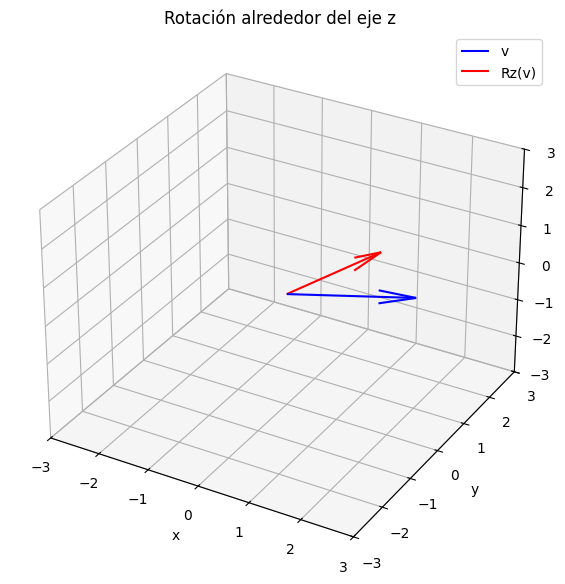

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

theta = np.pi / 4  # 45 grados
Rz = np.array([[np.cos(theta), -np.sin(theta), 0],
               [np.sin(theta),  np.cos(theta), 0],
               [0,              0,             1]])

# Vector original
v = np.array([2, 1, 0])

# Vector rotado
v_rot = Rz @ v

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0,0,0, *v, label='v', color='blue')
ax.quiver(0,0,0, *v_rot, label='Rz(v)', color='red')

ax.set_xlim(-3,3); ax.set_ylim(-3,3); ax.set_zlim(-3,3)
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
ax.legend(); ax.set_title("Rotación alrededor del eje z")
plt.show()


---

## 🔹 6. Columnas de una matriz = imagen de la base estándar

Cada matriz $A$ transforma los vectores de la **base estándar**:

$$
e_1 = (1,0,0),
e_2 = (0,1,0),
e_3 = (0,0,1).
$$

por lo que:

$$
A = [A e_1, A e_2, A e_3].
$$

→ **Las columnas de $A$ representan cómo $A$ transforma cada eje.**

---

### 💻 Visualización

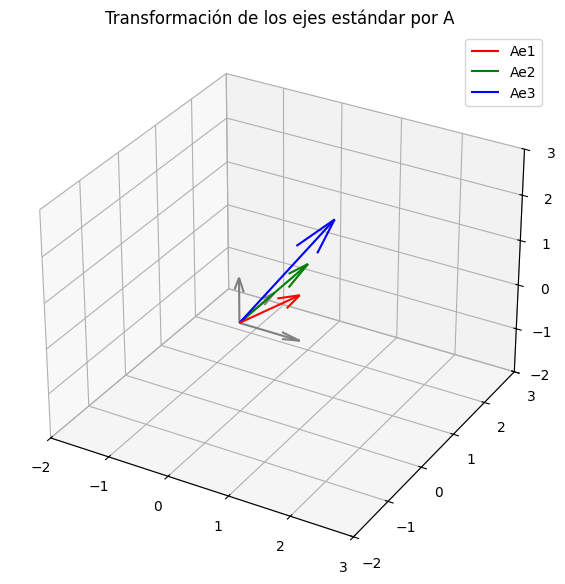

In [5]:
A = np.array([[1, 0, 1],
              [0, 2, 1],
              [1, 0, 2]])

e1, e2, e3 = np.eye(3)

Ae1 = A @ e1
Ae2 = A @ e2
Ae3 = A @ e3

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

# Ejes originales
ax.quiver(0,0,0, *e1, color='gray')
ax.quiver(0,0,0, *e2, color='gray')
ax.quiver(0,0,0, *e3, color='gray')

# Ejes transformados
ax.quiver(0,0,0, *Ae1, color='red', label='Ae1')
ax.quiver(0,0,0, *Ae2, color='green', label='Ae2')
ax.quiver(0,0,0, *Ae3, color='blue', label='Ae3')

ax.set_xlim(-2,3); ax.set_ylim(-2,3); ax.set_zlim(-2,3)
ax.set_title("Transformación de los ejes estándar por A")
ax.legend()
plt.show()


---

## 🔹 7. Producto cruz y matrices

El **producto cruz** puede representarse como una multiplicación matricial:

Para un vector $\mathbf{a}$:

$$
[a]_\times =
\begin{pmatrix}
0 & -a_3 & a_2 \\
a_3 & 0 & -a_1 \\
-a_2 & a_1 & 0 \\
\end{pmatrix}
$$

Entonces:

$$
[a]_\times b = a \times b
$$

---

### 💻 Ejemplo

In [6]:
a = np.array([1,2,3])
b = np.array([3,0,1])

a_cross = np.array([[0, -a[2], a[1]],
                    [a[2], 0, -a[0]],
                    [-a[1], a[0], 0]])

print("a × b =", np.cross(a,b))
print("[a]_× b =", a_cross @ b)

a × b = [ 2  8 -6]
[a]_× b = [ 2  8 -6]


---

## 🔹 8. Implementaciones útiles

In [7]:
def es_invertible(A):
    return not np.isclose(np.linalg.det(A), 0)

def clasificar_transformacion(A):
    det = np.linalg.det(A)
    if np.isclose(det, 0):
        return "No invertible: aplasta el espacio"
    elif det > 0:
        return "Invertible: preserva orientación"
    else:
        return "Invertible: invierte orientación"
    
def aplicar_transformacion(A, vectores):
    """Aplica A a una lista de vectores fila."""
    return np.array([A @ v for v in vectores])


---

## 🧩 9. Ejercicios sugeridos de programación

1. **Comprobador de rotaciones**
   Implementa una función que determine si una matriz es una rotación (condición: $A^TA = I$ y $\det(A)=1$).

2. **Volumen transformado**
   Escribe una función que reciba tres vectores $v_1,v_2,v_3$ y calcule el volumen del paralelepípedo antes y después de aplicar una matriz $A$.

3. **Transformación de figuras 3D**
   Genera una nube de puntos en forma de cubo y transforma la figura con diferentes matrices 3×3 (rotación, cizalla, escala).

4. **Explorador interactivo**
   Permite al usuario cambiar los valores de $A$ y observar cómo cambian los ejes transformados.

5. **Composición de transformaciones**
   Programa varias matrices de transformación y muestra cómo la multiplicación $A_2A_1$ corresponde a “aplicar primero $A_1$ y luego $A_2$”.

---

## 📚 Conclusión

Las matrices $3 \times 3$ permiten trabajar con **transformaciones reales del espacio tridimensional**.
Son fundamentales en computación gráfica, robótica, modelado físico, geometría y ciencia de datos.

> 💬 “Cada transformación en 3D tiene un alma matricial: entenderlas es dominar el espacio.”

---

✅ **Próxima lección:**
[**Matrices $n \times n$**](matrices_nxn.ipynb) — generalización a dimensiones arbitrarias y nuevas estructuras matriciales.

